# Кластеризація для ML/DL

## Завдання

До пункту видачі надійшли вироби з такими характеристиками: Всього виробів – 13000 одиниць, з них виготовлено на першому заводі — 8000 од., вагою 13 кг., зі стандартним відхиленням по вазі 0.5 кг.. На другому — 5000 од., вагою 12 кг., зі стандартним відхиленням по вазі 0.7 кг. Доля якісних виробів, вироблених на першому заводі, становить 0.85. Доля якісних виробів, вироблених на другому заводі 0,8.

Завдання: Написати код, з використанням EM-алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб.

## Розв'язок

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import multivariate_normal
# import GMM
from GMM import GMM

In [2]:
N = 13000           # загальна кількість деталей
n1 = 8000           # кількість деталей, виготовлених на першому заводі
n2 = 5000           # кількість деталей, виготовлених на другому заводі
m1 = 13             # вага виробів на першому заводі
m2 = 12             # вага виробів на другому заводі
sigma1 = 0.5        # стандартне відхилення виробів першого заводу
sigma2 = 0.7        # стандартне відхилення виробів другого заводу
theta1 = 0.85       # ймовірність отримання якісного виробу першого заводу
theta2 = 0.8        # ймовірність отримання якісного виробу другого заводу
max_iter = 1000     # кількість ітерацій для роботи алгоритму
tolerance = 0.0001  # точніть методу

# Згенеруємо виборки випадкових величин згідно умов завдання
x1 = np.random.normal(m1, sigma1, n1)   
x2 = np.random.normal(m2, sigma2, n2)
x=np.hstack([x1, x2])    # об'єднаємо виборки в одну


In [3]:
data = np.concatenate((x1, x2), axis = None)
data

array([12.3207916 , 14.40372884, 13.06625399, ..., 12.90257256,
       12.31134323, 13.2367317 ])

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:,1], label="data")
plt.scatter(centers[0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

In [ ]:
x1

In [ ]:
x2

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [ ]:
x = x.reshape(-1, 1)
gmm = GaussianMixture(n_components=2).fit(x)

In [ ]:
centers = gmm.means_.reshape(-1, 1)
print(centers)

In [ ]:
pr = gmm.predict(x)
x1 = x[pr == 0]
x2 = x[pr == 1]

In [ ]:
# create additional x2 array for visualization
add = np.array([np.nan]*(len(x1)-len(x2))).reshape(-1, 1)
x2_add = np.concatenate((x2, add))
np.random.shuffle(x2_add)

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
x1, y1 = make_blobs(8000, centers=1, cluster_std=0.5, center_box=(13,13))
x2, y2 = make_blobs(5000, centers=1, cluster_std=0.7, center_box=(12,12))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='cluster 1')
plt.scatter(x2[:, 0], x2[:, 1], color='green', label='cluster 2')

#plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")



plt.legend()
plt.show()

In [ ]:
gm = GaussianMixture(n_components=2).fit(x)
gm.get_params()

In [5]:
centers = gm.means_
print(centers)

NameError: name 'gm' is not defined

In [6]:

plt.scatter(centers[0], centers[1],c='r', label="centers")
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='cluster 1')
plt.scatter(x2[:, 0], x2[:, 1], color='green', label='cluster 2')

NameError: name 'centers' is not defined

In [132]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[0], centers[1],c='r', label="centers")
plt.legend()
plt.show() 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 800x600 with 0 Axes>

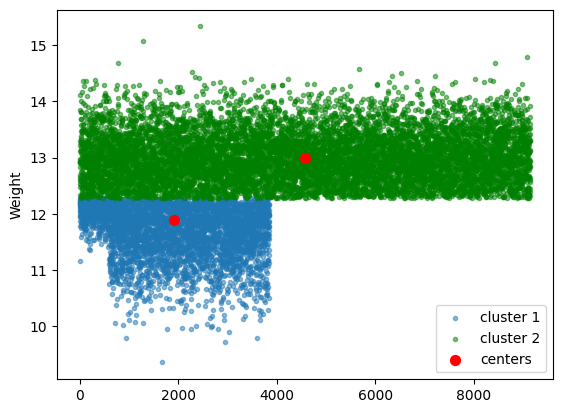

In [73]:
plt.scatter(range(len(x1)), x1, marker='.', alpha=0.5, label='cluster 1')
plt.scatter(range(len(x2_add)), x2_add, marker='.', c='green', alpha=0.5, label='cluster 2')
plt.scatter( len(x1)/2, centers[0], c='red', s = 50, label="centers")
plt.scatter( len(x2_add)/2, centers[1], c='red', s = 50)
plt.ylabel('Weight')
plt.legend()

In [40]:
def plot(title):
    '''
    Візуалізація точок даних і підігнану модель.
    введення:
    - заголовок: заголовок сюжету та ім’я, під яким він буде збережений.
    '''
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(x[:, 0], x[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

In [41]:
gmm = GMM(2, 2)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

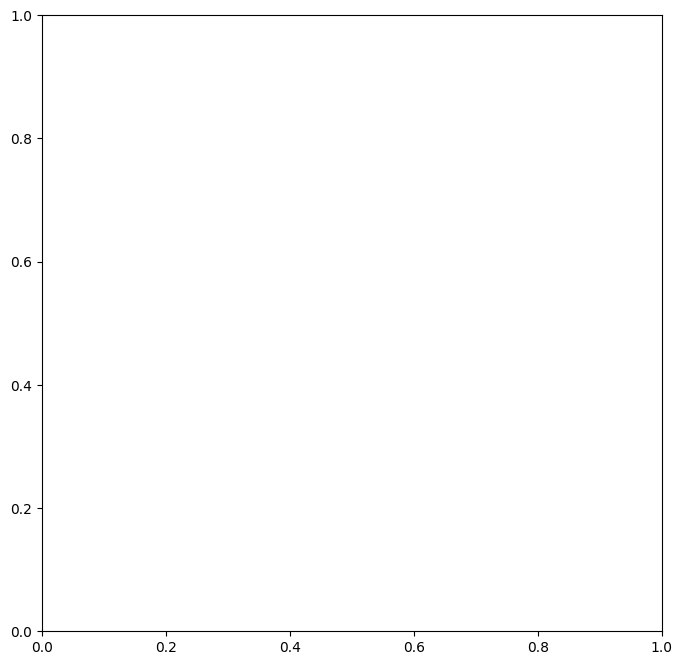

In [42]:
# Навчання GMM з використанням EM

# Ініціалізуємо EM-алгоритм з даними
gmm.init_em(x)
num_iters = 10
# Збереження логарифмічної ймовірності
log_likelihood = [gmm.log_likelihood(x)]
# будуємо діаграму
plot("Ітерація:  0")
for e in range(num_iters):
    # E-крок
    gmm.e_step()
    # M-крок
    gmm.m_step()
    # Обчислюємо логарифм правдоподібності
    log_likelihood.append(gmm.log_likelihood(X))
    print("Ітерація: {}, логарифм правдоподібності: {:.4f}".format(e+1, log_likelihood[-1]))
    # будуємо діаграму
    plot(title="Ітерація: " + str(e+1))